In [1]:
pwd

In [2]:
cd datasets

In [3]:
ls

In [4]:
cd ..

/Users/srikanthbhadragiri/Datamites


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [6]:
df = pd.read_csv('./datasets/Hospitals count in India - Statewise.csv')

In [7]:
df.shape

(37, 4)

In [8]:
df.dtypes

States/UTs                                    object
Number of hospitals in public sector          object
Number of hospitals in private sector         object
Total number of hospitals (public+private)    object
dtype: object

In [36]:
display(df.head())

,States/UTs,Public Hospitals,Private Hospitals,Total Hospitals
0,Lakshadweep,9,4,13
1,Chandigarh,9,4,13
2,Dadra & N Haveli,12,6,18
3,Puducherry,14,6,20
4,Daman & Diu,5,21,26


In [10]:
# Rename column names
df.rename(columns={"Number of hospitals in public sector": "Public Hospitals", 
                   "Number of hospitals in private sector": "Private Hospitals",
                   "Total number of hospitals (public+private)": "Total Hospitals"}, 
          inplace=True)

In [11]:
df.describe()

,States/UTs,Public Hospitals,Private Hospitals,Total Hospitals
count,37,36,36,36
unique,37,34,31,35
top,Jharkhand,30,6,13
freq,1,2,3,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   States/UTs         37 non-null     object
 1   Public Hospitals   36 non-null     object
 2   Private Hospitals  36 non-null     object
 3   Total Hospitals    36 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


### Initial Analysis
- Dataset consists of 4 columns and 37 rows of data
- Data represents various states/UTs, the count of hospitals in private, public sectors and Total count of hostitals

### What to infer?
- which states/UTs has more number of hospitals.
    - Show a pie chart
    - Show a bar chart
- which states/UTs has more number of private hospitals when compared with public hospitals.
    - Show in a stacked bar chart

-- Get the population index of each state/ut and compare which states/uts population with number of hospitals.

- cleanup
    - Find any null values in hospital counts
    - what could be done to fill them up
    - All datatypes are of object type.
        - convert Number of hospitals in public sector, private sector and total hospitals to int datatype

In [13]:
# Get list of all rows where we have null values in any columns

df[df['Public Hospitals'].isna() | 
   df['Private Hospitals'].isna() | 
   df['Total Hospitals'].isna()]

# *** Is there a better way to get this - 
#     mentioning all column names is not a viable option with datasets which have many column names. 

,States/UTs,Public Hospitals,Private Hospitals,Total Hospitals
36,Ladakh,NaN,NaN,NaN


### Inference:
    1. There is one row, with null values for all of the 3 columns. I feel its better delete the row.

In [14]:
# Drop a row from DataFrame based on index
df.drop([36], inplace=True)

In [15]:
# Code to replace 'comma' from values of three columns.
df['Public Hospitals'] = df['Public Hospitals'].str.replace(',', '').astype(int)
df['Private Hospitals'] = df['Private Hospitals'].str.replace(',', '').astype(int)
df['Total Hospitals'] = df['Total Hospitals'].str.replace(',', '').astype(int)

In [16]:
df.dtypes

States/UTs           object
Public Hospitals      int64
Private Hospitals     int64
Total Hospitals       int64
dtype: object

In [17]:
# Recalculating 'Total Hospitals' value. Identified that for Row 16 - '19 Chhattisgarh, the total value was incorrect.
df['Total Hospitals'] = df['Public Hospitals'] + df['Private Hospitals']

In [18]:
# Show top 5 states/UT's with largest number of hospitals (both public and private)
sorted_df = df.sort_values('Total Hospitals', ascending=False)
sorted_df.reset_index(drop=True)

,States/UTs,Public Hospitals,Private Hospitals,Total Hospitals
0,Uttar Pradesh,4635,12468,17103
1,Karnataka,2842,7842,10684
2,Rajasthan,2850,2794,5644
3,Telangana,863,3247,4110
4,Kerala,1280,2062,3342
5,Maharashtra,711,2492,3203
6,Bihar,1147,1887,3034
7,Odisha,1806,695,2501
8,Tamil Nadu,1217,1222,2439
9,Punjab,682,1638,2320


In [19]:
# Extract 3 columns of data (states, public hospitals, private hospitals) to show comparision
df_private_vs_public = sorted_df[['States/UTs',
                                  'Public Hospitals',
                                  'Private Hospitals']]
# Reset index values
df_private_vs_public.reset_index(drop=True).head()

,States/UTs,Public Hospitals,Private Hospitals
0,Uttar Pradesh,4635,12468
1,Karnataka,2842,7842
2,Rajasthan,2850,2794
3,Telangana,863,3247
4,Kerala,1280,2062


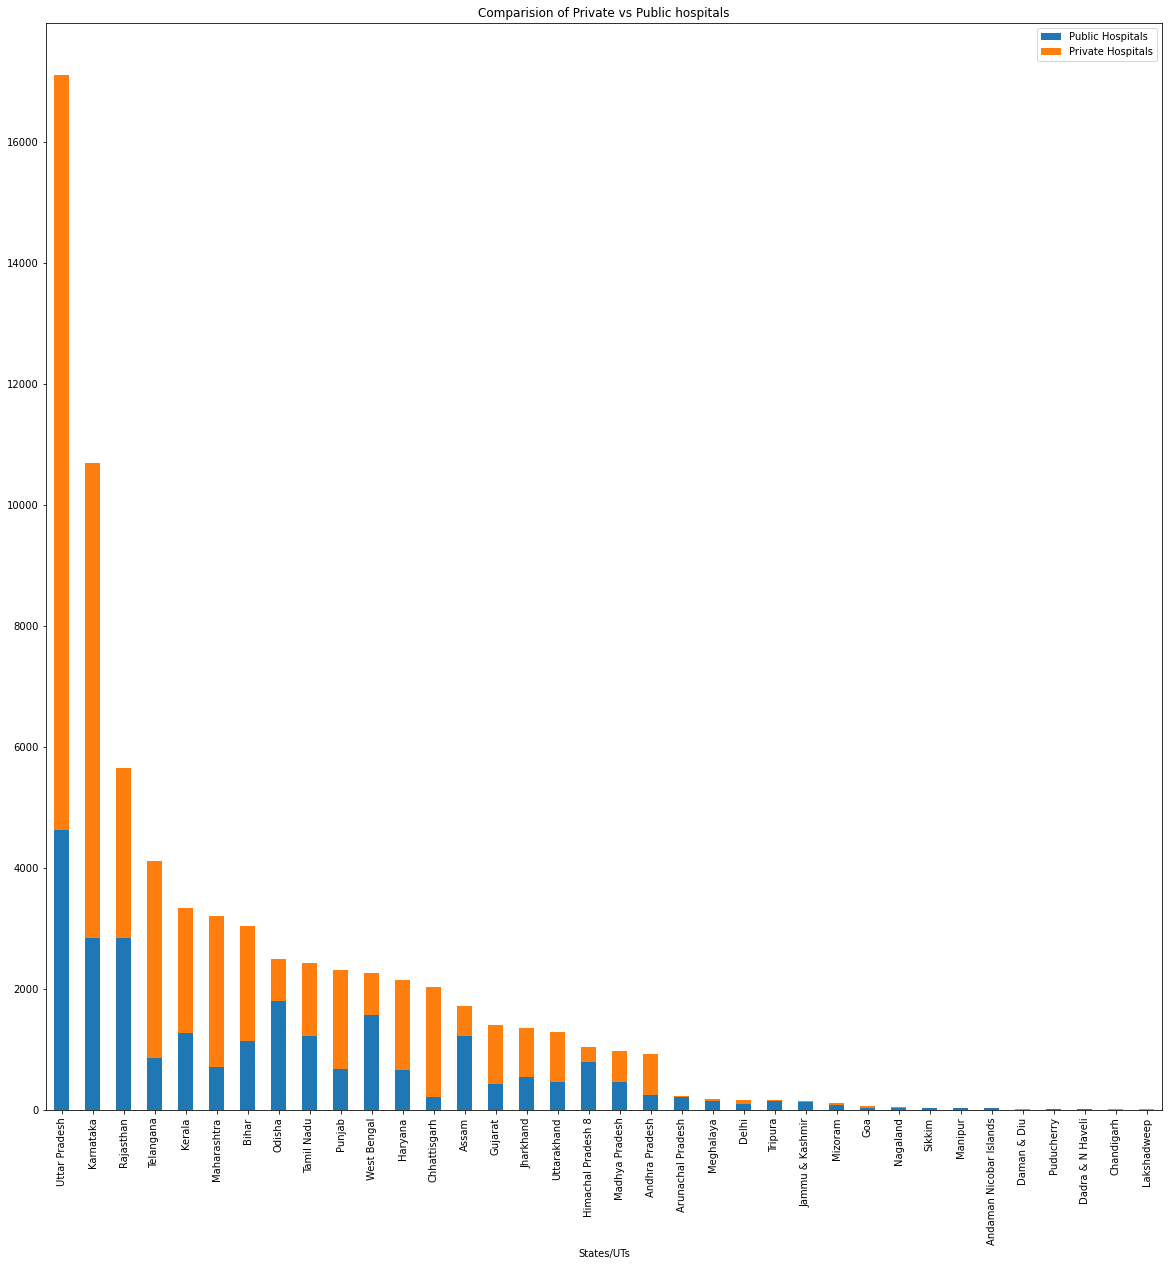

In [20]:
# Draw a stacked bar chart to display the data states and compare the ratio of public vs private hospitals
rcParams['figure.figsize'] = 20,20

df_private_vs_public.plot(kind='bar', 
                          stacked=True, 
                          x="States/UTs", 
                          title="Comparision of Private vs Public hospitals")
plt.show()

In [21]:
sorted_df['Private Percent'] = round((sorted_df['Private Hospitals'] / sorted_df['Total Hospitals']) * 100)
sorted_df['Public Percent'] = round((sorted_df['Public Hospitals'] / sorted_df['Total Hospitals']) * 100)
display(sorted_df)

,States/UTs,Public Hospitals,Private Hospitals,Total Hospitals,Private Percent,Public Percent
35,Uttar Pradesh,4635,12468,17103,73.0,27.0
34,Karnataka,2842,7842,10684,73.0,27.0
33,Rajasthan,2850,2794,5644,50.0,50.0
32,Telangana,863,3247,4110,79.0,21.0
31,Kerala,1280,2062,3342,62.0,38.0
30,Maharashtra,711,2492,3203,78.0,22.0
29,Bihar,1147,1887,3034,62.0,38.0
28,Odisha,1806,695,2501,28.0,72.0
27,Tamil Nadu,1217,1222,2439,50.0,50.0
26,Punjab,682,1638,2320,71.0,29.0


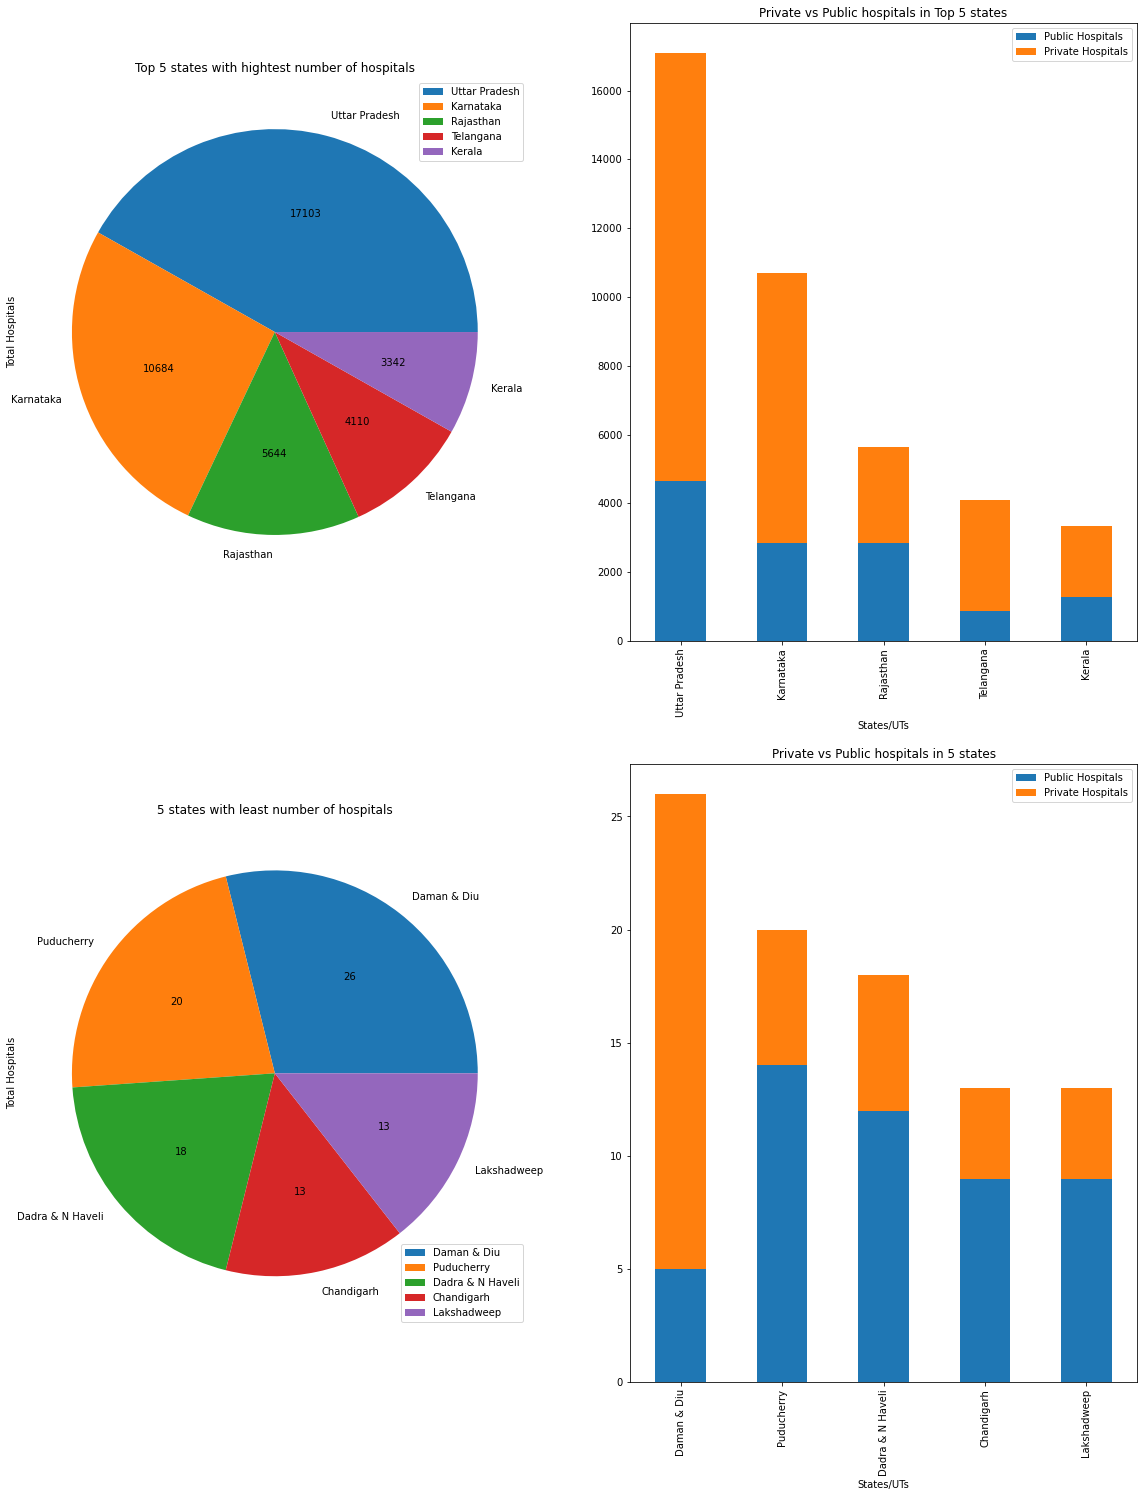

In [31]:
rcParams['figure.figsize'] = 20,25
figure, axes = plt.subplots(2,2)

stateNames = sorted_df['States/UTs'].head()
totalHospitals = sorted_df['Total Hospitals'].head()

top_5_df = sorted_df.head()
i=[0]
def abs_value_top5(val):
    a = top_5_df.iloc[i[0],[3][0]]
    i[0]+=1
    return a

# Plot a pie chart in first subplot
# Display Top 5 states with hightest number of hospitals 

top_5_df.plot.pie(y='Total Hospitals', 
                  labels=stateNames, 
                  autopct=abs_value_top5,
                  ax=axes[0][0], 
                  title="Top 5 states with hightest number of hospitals")

# Plot a stacked bar chart in second subplot
# Display the data of top 5 states and compare the count of public vs private hospitals
df_private_vs_public.head().plot(kind='bar', 
                                 stacked=True, 
                                 x="States/UTs",
                                 ax=axes[0][1], title="Private vs Public hospitals in Top 5 states")

# Display 5 states with least number of hospitals
stateNamesLast = sorted_df['States/UTs'].tail()
least_5_df = sorted_df.tail()

j=[0]
def abs_value_least5(val):
    a = least_5_df.iloc[j[0],[3][0]]
    j[0]+=1
    return a

# Plot a pie chart in first subplot
# Display Least 5 states with hightest number of hospitals 
least_5_df.plot.pie(y='Total Hospitals', 
                    labels=stateNamesLast, 
                    autopct=abs_value_least5,
                    ax=axes[1][0], 
                    title="5 states with least number of hospitals")

# Plot a stacked bar chart in second subplot
# Display the data of 5 states with least number of hospitals and compare the count of public vs private
df_private_vs_public.tail().plot(kind='bar', 
                                 stacked=True, 
                                 x="States/UTs",
                                 ax=axes[1][1], title="Private vs Public hospitals in 5 states")

plt.show()

In [34]:
# States with percentage of private hospitals compared to public hospitals

pri_pub_percent = sorted_df[['States/UTs','Private Percent','Public Percent']].sort_values('Private Percent', ascending=False)
display(top_private_states.head())

,States/UTs,Private Percent,Public Percent
16,Chhattisgarh,89.0,11.0
4,Daman & Diu,81.0,19.0
32,Telangana,79.0,21.0
30,Maharashtra,78.0,22.0
35,Uttar Pradesh,73.0,27.0


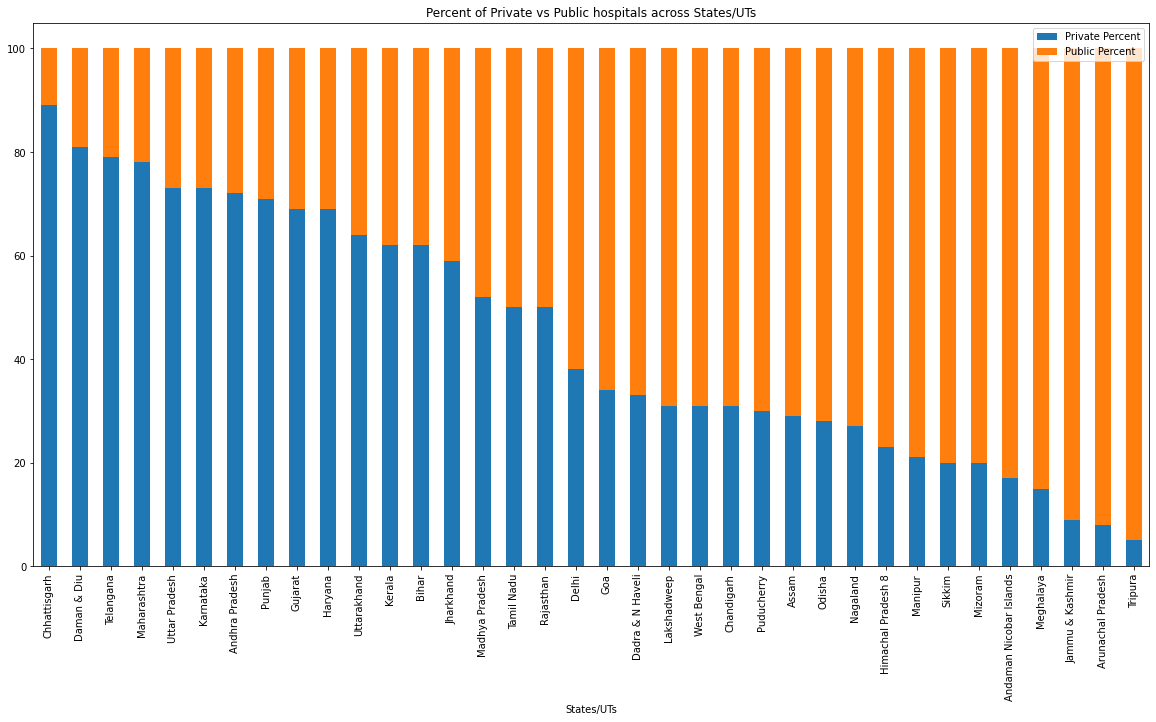

In [35]:
rcParams['figure.figsize'] = 20,10

pri_pub_percent.plot(kind='bar', 
                     stacked=True, 
                     x="States/UTs", 
                     title="Percent of Private vs Public hospitals across States/UTs")

plt.show()